In [5]:
import cv2
import os, re
#from sensor_msgs.msg import Image
#from cv_bridge import CvBridge
import numpy as np
# conda install libgcc

# setup dataset
bagname = 'cloth_0813/1137.bag'
home = bagname[:-4]
rgb_dir = home + '/rgb'
depth_dir = home + '/depth'
if not os.path.exists(home):
    os.mkdir(home)
if not os.path.exists(depth_dir):
    os.mkdir(depth_dir)
if not os.path.exists(rgb_dir):
    os.mkdir(rgb_dir)

bag = rosbag.Bag(bagname)
t1 = '/yumi/ikSloverVel_controller/state'
t2 = '/yumi/ikSloverVel_controller/ee_cart_position'

topics = bag.get_type_and_topic_info()[1].keys()
t3 = '/camera/image/rgb_611205001943'
t4 = '/camera/image/registered_depth__611205001943'

bridge = CvBridge()


print bag
count = 0
tt_pos = np.array([])
tt_vel = np.array([])
for topic, msg, t in bag.read_messages(topics=[t1,t2,t3,t4]):
    if topic == t3:
        count = count + 1
        cv_img = bridge.imgmsg_to_cv2(msg)
        cv_img = cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB)
        cv2.imwrite(os.path.join(rgb_dir + "/%04i.jpg" % count), cv_img)
    if topic == t4:
        cv_img = bridge.imgmsg_to_cv2(msg)
        cv2.imwrite(os.path.join(depth_dir + "/%04i.png" % count), cv_img)
    if topic == t2:
        pos = np.array(msg.data)
        tt_pos = np.vstack((tt_pos, pos)) if tt_pos.size else pos
    if topic == t1:
        vel = np.array(msg.data)
        tt_vel = np.vstack((tt_vel,vel)) if tt_vel.size else vel

np.savez(os.path.join(home + "/data"),pos=tt_pos,vel=tt_vel)

NameError: name 'rosbag' is not defined

In [6]:
bagname = 'cloth_0813/1137.bag'
home = bagname[:-4]
rgb_dir = home + '/rgb'
depth_dir = home + '/depth'

def get_filelist(home_dir):
    filelist = []
    for dirpath, dirnames, filenames in os.walk(home_dir):
        for filename in filenames:
            fn = os.path.join(dirpath,filename)
            filelist.append(fn)
    filelist = sorted(filelist)
    return filelist

depthlist = get_filelist(depth_dir)
rgblist = get_filelist(rgb_dir)

print rgblist

[]


384 157765705.0 80132


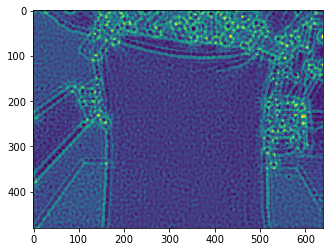

384 1536


In [9]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np


def mk(s):#morph kernel
    return np.ones((s,s),np.uint8)

def gabor_feat(img, num_theta = 4, grid = 80, show_fg=False,show_step=False):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ks = 101 # kernel size
    thresh = 200
    
    avg = np.zeros(gray.shape)
    count = 0
    
    rows, cols = gray.shape

    hist = []
    for i in range(num_theta):
        g_kernel1 = cv2.getGaborKernel((ks, ks), sigma = 6.0, theta = i*np.pi/num_theta, lambd = 10.0, gamma=0.5, psi=0, ktype=cv2.CV_32F)
        filtered = cv2.filter2D(gray, cv2.CV_8UC3, g_kernel1)
        count = count+1
        
        avg = avg + filtered
        
        count = 0
        for col in np.arange(0, cols, grid):
            for row in np.arange(0, rows, grid):
                block = filtered[row:row+grid,col:col+grid]
                val =  float(np.sum(block))
                hist.append(val)
        if show_step:
            plt.imshow(filtered)
            plt.show()
    avg = avg/float(num_theta)
    avg = np.uint8(avg)
    return avg, hist

i = 100
im = cv2.imread(rgblist[i])
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gabor, hist = gabor_feat(im, num_theta = 8, show_step = 0, grid=80)
print len(hist), sum(hist), sum(sum(gabor))

plt.imshow(gabor), plt.show()
print len(hist), 16*12*8


In [10]:
# build up the dataset
feat = np.array([])
for i in range(len(rgblist)):
    gabor, hist = gabor_feat(cv2.imread(rgblist[i]), num_theta = 8, grid=80, show_step = 0)
    #gabor = cv2.resize(gabor,(50,50))
#     plt.imshow(gabor)
#     plt.show()
    hist = np.array(hist)
    feat = np.vstack((feat,hist)) if feat.size else hist
    print feat.shape

# find the edges
data = np.load(home+'/data.npz')
vel = data['vel']
pos = data['pos']
print feat.shape
print pos.shape
print vel.shape
np.savez(home+'/data2_float_80_bg',feat=feat,vel=vel,pos=pos)

(384,)
(2, 384)
(3, 384)
(4, 384)
(5, 384)
(6, 384)
(7, 384)
(8, 384)
(9, 384)
(10, 384)
(11, 384)
(12, 384)
(13, 384)
(14, 384)
(15, 384)
(16, 384)
(17, 384)
(18, 384)
(19, 384)
(20, 384)
(21, 384)
(22, 384)
(23, 384)
(24, 384)
(25, 384)
(26, 384)
(27, 384)
(28, 384)
(29, 384)
(30, 384)
(31, 384)
(32, 384)
(33, 384)
(34, 384)
(35, 384)
(36, 384)
(37, 384)
(38, 384)
(39, 384)
(40, 384)
(41, 384)
(42, 384)
(43, 384)
(44, 384)
(45, 384)
(46, 384)
(47, 384)
(48, 384)
(49, 384)
(50, 384)
(51, 384)
(52, 384)
(53, 384)
(54, 384)
(55, 384)
(56, 384)
(57, 384)
(58, 384)
(59, 384)
(60, 384)
(61, 384)
(62, 384)
(63, 384)
(64, 384)
(65, 384)
(66, 384)
(67, 384)
(68, 384)
(69, 384)
(70, 384)
(71, 384)
(72, 384)
(73, 384)
(74, 384)
(75, 384)
(76, 384)
(77, 384)
(78, 384)
(79, 384)
(80, 384)
(81, 384)
(82, 384)
(83, 384)
(84, 384)
(85, 384)
(86, 384)
(87, 384)
(88, 384)
(89, 384)
(90, 384)
(91, 384)
(92, 384)
(93, 384)
(94, 384)
(95, 384)
(96, 384)
(97, 384)
(98, 384)
(99, 384)
(100, 384)
(101, 384)

(757, 384)
(758, 384)
(759, 384)
(760, 384)
(761, 384)
(762, 384)
(763, 384)
(764, 384)
(765, 384)
(766, 384)
(767, 384)
(768, 384)
(769, 384)
(770, 384)
(771, 384)
(772, 384)
(773, 384)
(774, 384)
(775, 384)
(776, 384)
(777, 384)
(778, 384)
(779, 384)
(780, 384)
(781, 384)
(782, 384)
(783, 384)
(784, 384)
(785, 384)
(786, 384)
(787, 384)
(788, 384)
(789, 384)
(790, 384)
(791, 384)
(792, 384)
(793, 384)
(794, 384)
(795, 384)
(796, 384)
(797, 384)
(798, 384)
(799, 384)
(800, 384)
(801, 384)
(802, 384)
(803, 384)
(804, 384)
(805, 384)
(806, 384)
(807, 384)
(808, 384)
(809, 384)
(810, 384)
(811, 384)
(812, 384)
(813, 384)
(814, 384)
(815, 384)
(816, 384)
(817, 384)
(818, 384)
(819, 384)
(820, 384)
(821, 384)
(822, 384)
(823, 384)
(824, 384)
(825, 384)
(826, 384)
(827, 384)
(828, 384)
(829, 384)
(830, 384)
(831, 384)
(832, 384)
(833, 384)
(834, 384)
(835, 384)
(836, 384)
(837, 384)
(838, 384)
(839, 384)
(840, 384)
(841, 384)
(842, 384)
(843, 384)
(844, 384)
(845, 384)
(846, 384)
(847, 384)